# `ANALISIS EXPLORATORIO DE DATOS (EDA)`

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import warnings
warnings.filterwarnings("ignore")

In [178]:
A_electricos = pd.read_csv('Autos_Electicos.csv')

In [179]:
A_electricos

,Brand,RapidCharge,Price,Efficiency_WhMi,FastCharge_MiH
0,Tesla,Yes,58808.80,10,584
1,Volkswagen,Yes,31800.00,10,155
2,Polestar,Yes,59826.40,9,385
3,BMW,Yes,72122.40,8,348
4,Honda,Yes,34976.82,10,118
...,...,...,...,...,...
98,Nissan,Yes,47700.00,8,273
99,Audi,Yes,101813.00,6,336
100,Nissan,Yes,53000.00,8,273
101,Nissan,Yes,68900.00,7,280


In [180]:
#Agregamos una columna que es la eficiencia que tendria en millas por galon, ya que 1 milla por galón (mpg) es aproximadamente equivalente a 33.7 vatios por milla (Wh/mi).
A_electricos['Efficiency_MPG'] = round(33.7 * A_electricos['Efficiency_WhMi'],2)
A_electricos

,Brand,RapidCharge,Price,Efficiency_WhMi,FastCharge_MiH,Efficiency_MPG
0,Tesla,Yes,58808.80,10,584,337.0
1,Volkswagen,Yes,31800.00,10,155,337.0
2,Polestar,Yes,59826.40,9,385,303.3
3,BMW,Yes,72122.40,8,348,269.6
4,Honda,Yes,34976.82,10,118,337.0
...,...,...,...,...,...,...
98,Nissan,Yes,47700.00,8,273,269.6
99,Audi,Yes,101813.00,6,336,202.2
100,Nissan,Yes,53000.00,8,273,269.6
101,Nissan,Yes,68900.00,7,280,235.9


In [181]:
A_electricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   RapidCharge      103 non-null    object 
 2   Price            103 non-null    float64
 3   Efficiency_WhMi  103 non-null    int64  
 4   FastCharge_MiH   103 non-null    int64  
 5   Efficiency_MPG   103 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.0+ KB


In [182]:
A_gasolina = pd.read_csv('Autos_Gasolina.csv')
A_gasolina

,Marca,citympg,highwaympg,price
0,Alfa-romeo,20.0,27.0,15498.0
1,Audi,19.0,24.0,17859.0
2,Bmw,19.0,25.0,26119.0
3,Buick,18.0,21.0,33647.0
4,Chevrolet,41.0,46.0,6007.0
5,Dodge,28.0,34.0,7875.0
6,Honda,30.0,35.0,8185.0
7,Isuzu,31.0,36.0,8916.0
8,Jaguar,14.0,18.0,34600.0
9,Mazda,26.0,32.0,10653.0


In [183]:
A_gasolina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Marca       22 non-null     object 
 1   citympg     22 non-null     float64
 2   highwaympg  22 non-null     float64
 3   price       22 non-null     float64
dtypes: float64(3), object(1)
memory usage: 836.0+ bytes


VALORES NULOS

In [184]:
A_electricos.isnull().sum()

Brand              0
RapidCharge        0
Price              0
Efficiency_WhMi    0
FastCharge_MiH     0
Efficiency_MPG     0
dtype: int64

In [185]:
A_gasolina.isnull().sum()

Marca         0
citympg       0
highwaympg    0
price         0
dtype: int64

VALORES DUPLICADOS

In [186]:
# Buscamos filas con valores duplicados
duplicados = A_gasolina[A_gasolina.duplicated()] 
duplicados

,Marca,citympg,highwaympg,price


In [187]:
duplicados = A_electricos[A_electricos.duplicated()] 
duplicados

,Brand,RapidCharge,Price,Efficiency_WhMi,FastCharge_MiH,Efficiency_MPG


No tenemos valores duplicados

OUTLIERS

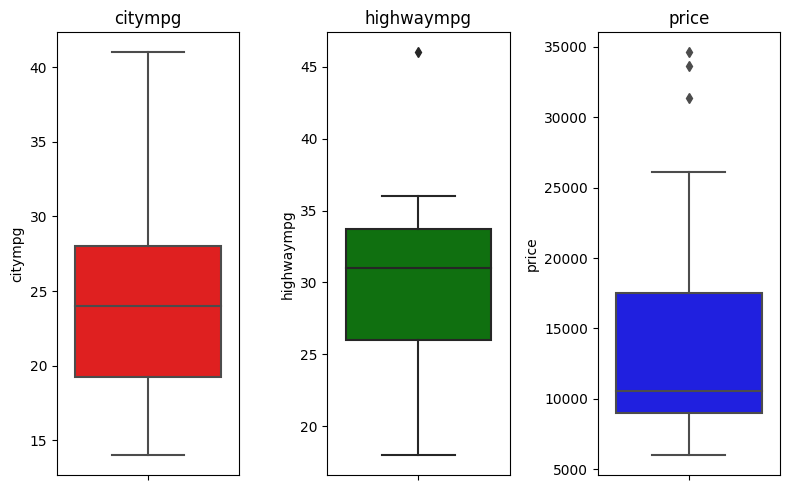

In [188]:
#Graficamos outliers
columnas = ['citympg', 'highwaympg', 'price']
	

colores = ['red', 'green', 'blue']

plt.figure(figsize=(8, 5))

for i, column in enumerate(columnas):
    plt.subplot(1,3 , i+1)  
    sns.boxplot(y=A_gasolina[column], color=colores[i])
    plt.title(column)

plt.tight_layout()
plt.show()

In [189]:
A_gasolina[A_gasolina['highwaympg'] > 40]

,Marca,citympg,highwaympg,price
4,Chevrolet,41.0,46.0,6007.0


In [190]:
A_gasolina[A_gasolina['price'] > 28000]

,Marca,citympg,highwaympg,price
3,Buick,18.0,21.0,33647.0
8,Jaguar,14.0,18.0,34600.0
15,Porsche,17.0,26.0,31400.0


observamos cuales son lo ouliers y observamos que no hay relacion precio autonomia sino que se relaciona mas con la marca del auto. 

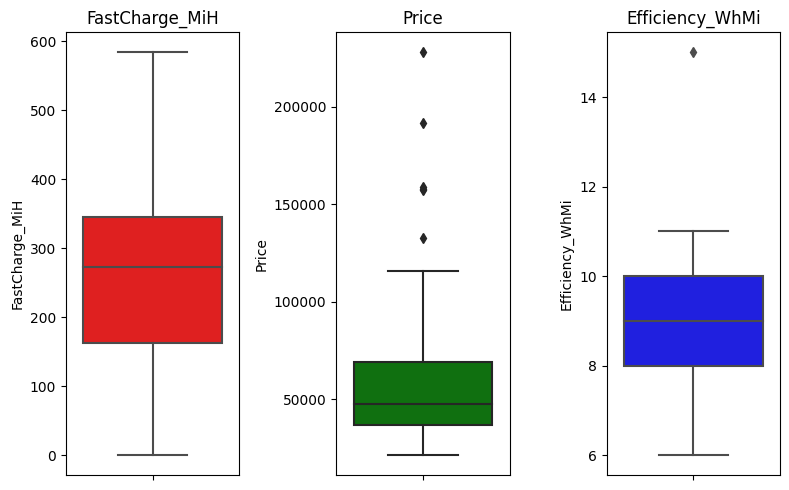

In [191]:
#Graficamos outliers
columnas = ['FastCharge_MiH', 'Price', 	'Efficiency_WhMi']
	

colores = ['red', 'green', 'blue']

plt.figure(figsize=(8, 5))

for i, column in enumerate(columnas):
    plt.subplot(1,3 , i+1)  
    sns.boxplot(y=A_electricos[column], color=colores[i])
    plt.title(column)

plt.tight_layout()
plt.show()

In [192]:
A_electricos[A_electricos['Price'] > 150000]

,Brand,RapidCharge,Price,Efficiency_WhMi,FastCharge_MiH,Efficiency_MPG
16,Porsche,Yes,191627.86,7,485,235.9
48,Lightyear,Yes,157940.00,15,336,505.5
51,Tesla,Yes,227900.00,8,572,269.6
72,Porsche,Yes,159000.00,7,479,235.9
79,Porsche,Yes,157199.06,7,503,235.9


In [193]:
A_electricos[A_electricos['Efficiency_WhMi'] > 14]

,Brand,RapidCharge,Price,Efficiency_WhMi,FastCharge_MiH,Efficiency_MPG
48,Lightyear,Yes,157940.0,15,336,505.5


Observamos que son datos atipicos por ser marcas de altagama

<Axes: >

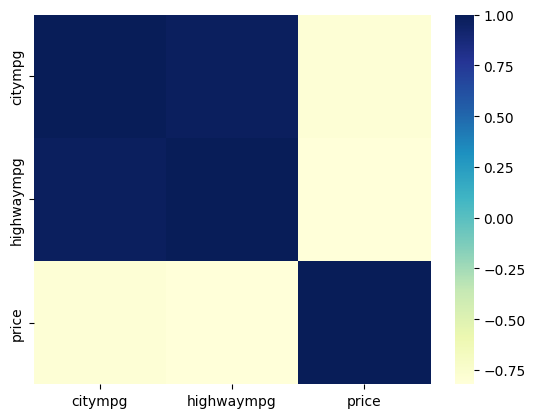

In [194]:
#Realizamos una matriz de correlación de autos a gasolina
# Filtra solo las columnas numéricas
A_gasolina_num = A_gasolina.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = A_gasolina_num.corr()

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu")

Observamos que existe cierta correlación entre la autonomia de los autos a gasolina tanto en autopista como en la ciudad.
No presentan correlacion de entre precio y autonomía.

<Axes: >

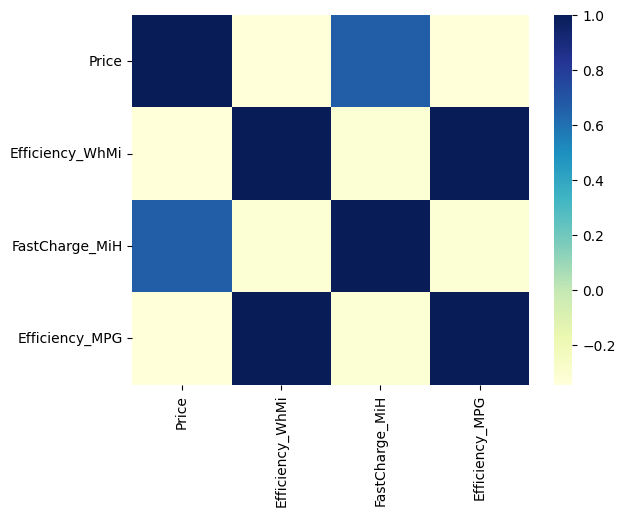

In [195]:
#Realizamos una matriz de correlacion de autos electricos
# Filtra solo las columnas numéricas
A_electricos_num = A_electricos.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = A_electricos_num.corr()

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu")

En este gráfico si podemos observar la alta correlación que hay respecto al precio y eficiencia de los autos electricos.

Comparacion de precios entre autos eletricos y a gasolina. 

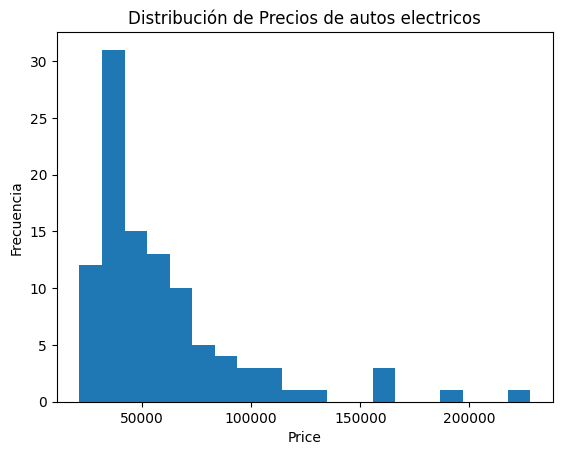

In [196]:
#Observamos la distribución de precios de los autos electricos
plt.hist(A_electricos['Price'], bins=20)  
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de autos electricos')
plt.show()

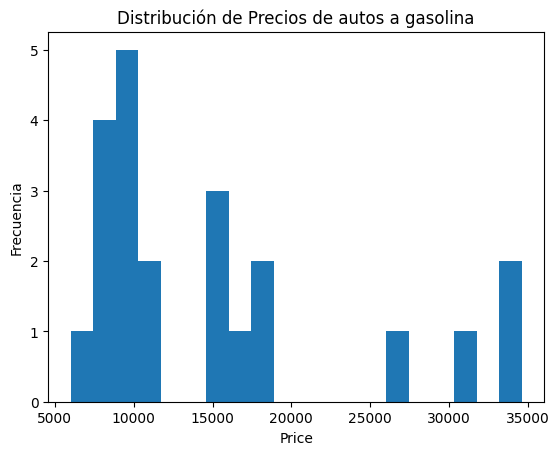

In [197]:
3#Observamos la distribución de precios de los autos a gasolina
plt.hist(A_gasolina['price'], bins=20)  
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de autos a gasolina')
plt.show()

Comparamos los precios-marca de autos electricos con autos a gasolina.

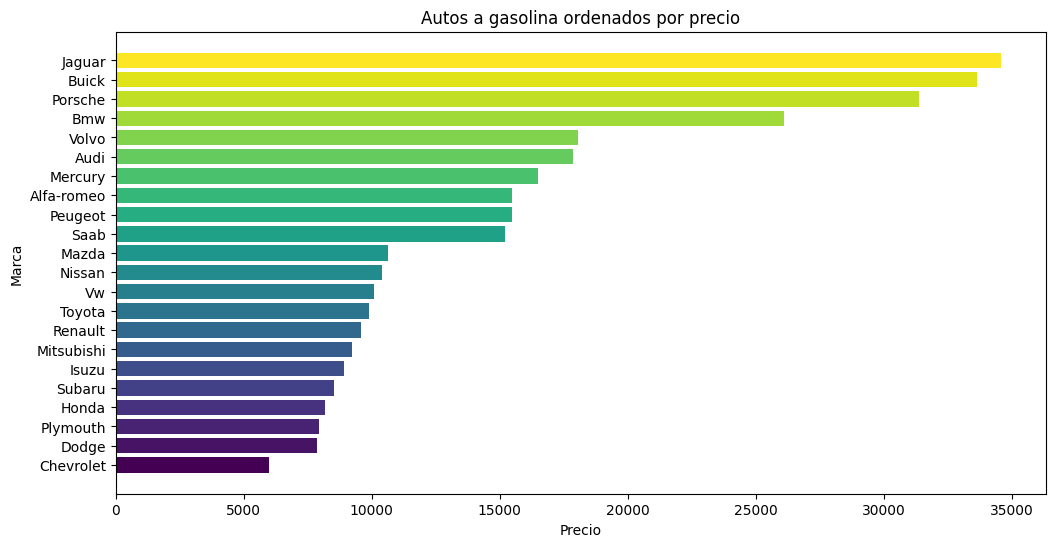

In [198]:
# Realizamos un gráfico de barras ordenando las marcas de autos a gasolina de más baratas a más caras.
A_gasolina = A_gasolina.sort_values(by='price', ascending=True)

# Luego, agrupa los autos por marca y toma el primero de cada grupo, que será el más barato.
autos_mas_baratos = A_gasolina.groupby('Marca').first()

# Ordena los autos más baratos por precio de manera ascendente.
autos_mas_baratos = autos_mas_baratos.sort_values(by='price', ascending=True)

# Ahora, puedes crear un gráfico de barras horizontales con los autos más baratos ordenados.
plt.figure(figsize=(12, 6))

# Utiliza una paleta de colores (viridis) para asignar un color a cada barra.
colores = plt.cm.viridis(np.linspace(0, 1, len(autos_mas_baratos)))

for i, (marca, datos) in enumerate(autos_mas_baratos.iterrows()):
    plt.barh(marca, datos['price'], color=colores[i])

plt.xlabel('Precio')
plt.ylabel('Marca')
plt.title('Autos a gasolina ordenados por precio')
plt.show()

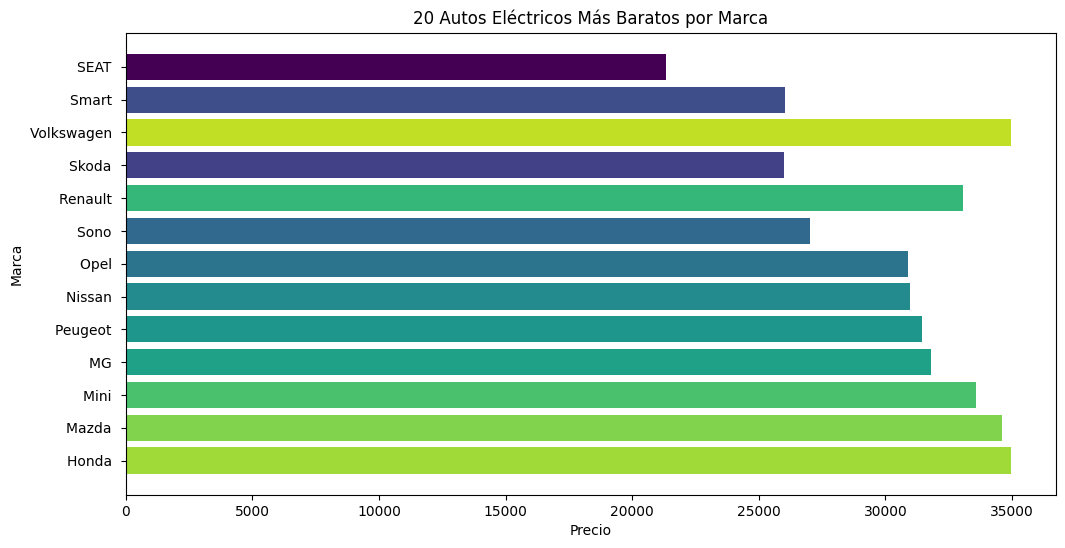

In [199]:
# Primero, ordena el DataFrame por precio de manera ascendente.
A_electricos = A_electricos.sort_values(by='Price', ascending=True)

# Luego, toma los primeros 20 autos más baratos.
autos_mas_baratos = A_electricos.head(20)

# Ahora, puedes crear un gráfico de barras horizontales con los 20 autos más baratos ordenados por precio.
plt.figure(figsize=(12, 6))

for i, (marca, precio) in enumerate(zip(autos_mas_baratos['Brand'], autos_mas_baratos['Price'])):
    plt.barh(marca, precio, color=colores[i])

plt.xlabel('Precio')
plt.ylabel('Marca')
plt.title('20 Autos Eléctricos Más Baratos por Marca')
plt.gca().invert_yaxis() 
plt.show()

In [167]:
A_gasolina.head(1)

,Marca,citympg,highwaympg,price
4,Chevrolet,41.0,46.0,6007.0


In [200]:
A_electricos.head(1)

,Brand,RapidCharge,Price,Efficiency_WhMi,FastCharge_MiH,Efficiency_MPG
44,SEAT,Yes,21336.74,10,106,337.0


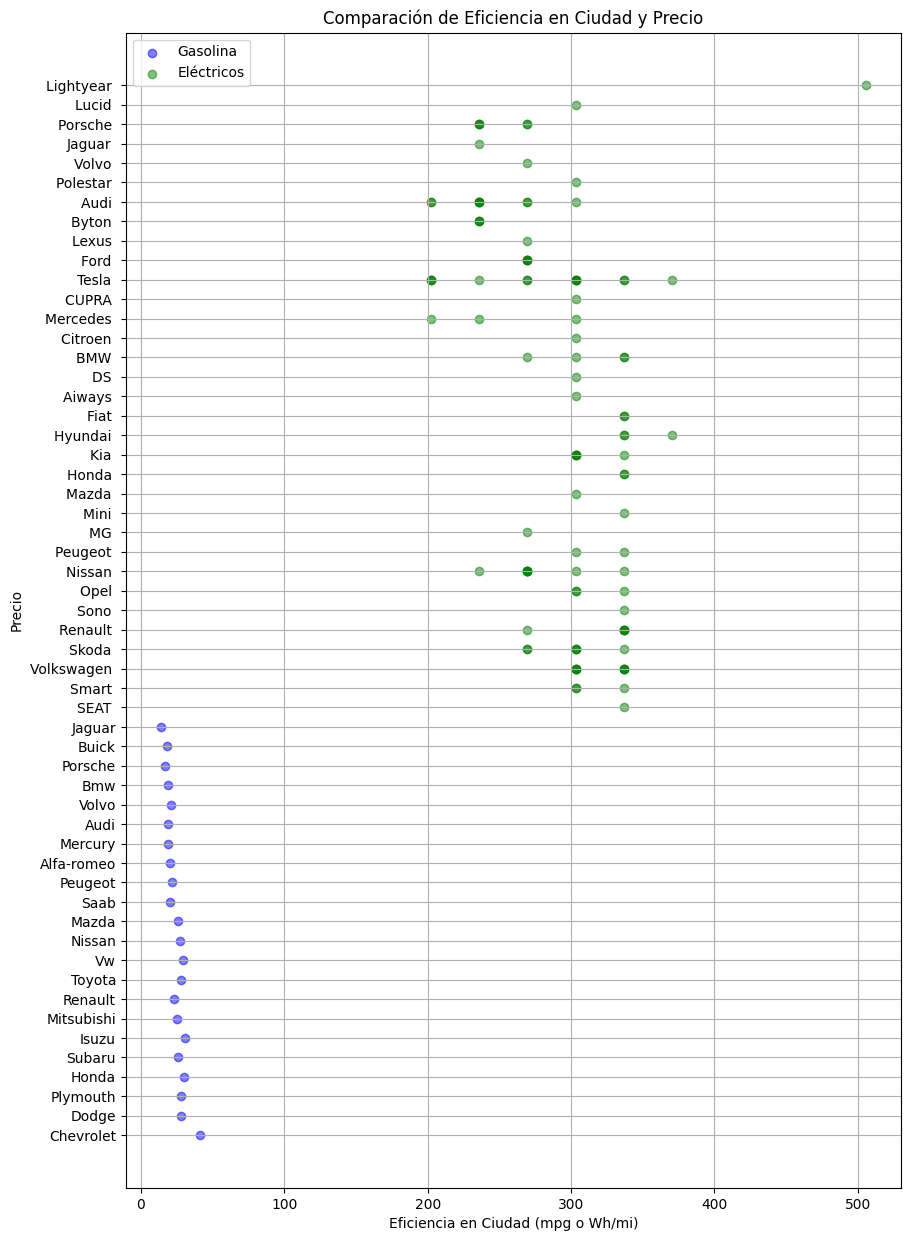

In [201]:
plt.figure(figsize=(10, 15))

plt.scatter(A_gasolina['citympg'], A_gasolina['Marca'], label='Gasolina', color='blue', alpha=0.5)
plt.scatter(A_electricos['Efficiency_MPG'], A_electricos['Brand'], label='Eléctricos', color='green', alpha=0.5)

plt.xlabel('Eficiencia en Ciudad (mpg o Wh/mi)')
plt.ylabel('Precio')
plt.title('Comparación de Eficiencia en Ciudad y Precio')
plt.legend()
plt.grid(True)

plt.show()

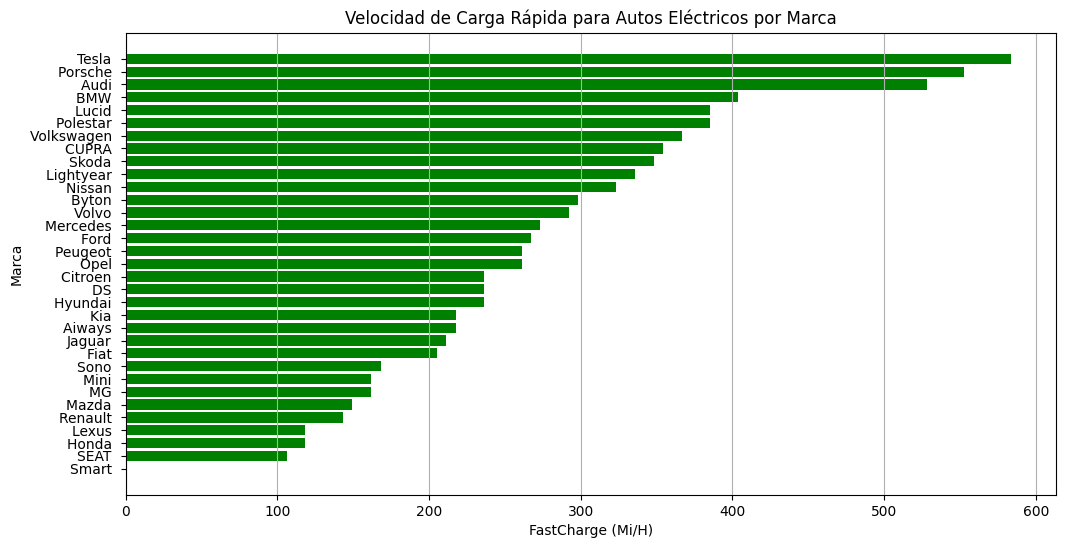

In [202]:
# Filtrar solo los autos eléctricos (A_electricos) y seleccionar las columnas de interés.
autos_electricos = A_electricos[['Brand', 'FastCharge_MiH']]

autos_electricos = autos_electricos.sort_values(by='FastCharge_MiH', ascending=False)

# Crear el gráfico de barras horizontales.
plt.figure(figsize=(12, 6))

# Utilizar la columna 'Brand' como etiquetas de marca en el eje Y y 'FastCharge_KmH' como valores en el eje X.
plt.barh(autos_electricos['Brand'], autos_electricos['FastCharge_MiH'], color='green')

plt.xlabel('FastCharge (Mi/H)')
plt.ylabel('Marca')
plt.title('Velocidad de Carga Rápida para Autos Eléctricos por Marca')
plt.gca().invert_yaxis() 
plt.grid(axis='x')  # Agregar una cuadrícula en el eje X para facilitar la lectura de los valores.

plt.show()

Conclusiones:

- Los precios de los autos electricos estan relacionados a la calidad del auto tanto en su autonomia, como en su carga rapida.
- Las cargas rapidas por hora de los autos electricos demuestran que pueden cargar suficiente energía para recorrer una distancia significativa en un período de tiempo más corto, lo que es beneficioso para viajes largos.
- Comparando los autos electricos y los auto a gasolina podemos observar que la autonomia de los autos electricos es mucho mayor que la de los autos a gasolina por lo que se se amortizara en el precio. 